In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import seaborn as sns
plt.style.use('seaborn')
import matplotlib.colors as mcolors
import missingno as msno

In [3]:
#загружаем файлы данных
df_courses = pd.read_csv("courses.csv")
df_students = pd.read_csv('students.csv')
df_course_contents= pd.read_csv('course_contents.csv')
df_progress = pd.read_csv('progresses.csv')
df_progress_phases = pd.read_csv('progress_phases.csv')

**Объединение таблиц**<br>
Меняем названия колонок для объединения таблиц и улучшения читаемости итоговой, объединенной таблицы. В нескольких таблицах есть одинаковые названия колонок, которые содержат разные данные. 
Например, courses.csv -  id – идентификатор курса, в progresses.csv -  id – идентификатор прогресса

In [4]:
df_courses.rename(columns = {'id':'course_id','title':'course_title','field':'course_field'}, inplace = True)
df_courses.index = df_courses['Unnamed: 0']
del df_courses['Unnamed: 0'] #убран столбец, дублирующий индекс
df_courses.head(1)

,course_id,course_title,course_field
Unnamed: 0,,,
0,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development


In [5]:
df_progress.rename(columns = {'id':'progress_id'}, inplace = True)
df_progress.head(1)

,progress_id,student_id,course_id
0,8459fbc07e32ec92bd7b43d7df9bfa89,a6ae278c0eab719b3784e5ea147c128f,0770b1b039964228294f1f34b29fc2c1


In [6]:
#объединение всех таблиц, кроме students.scv
df_full_courses_info_1= pd.merge(df_progress_phases,df_progress, on = 'progress_id',how = 'inner')
df_full_courses_info = pd.merge(df_courses,df_course_contents, on = 'course_id',how = 'inner')
df_main_dataframe = pd.merge (df_full_courses_info_1,df_full_courses_info,on = ['module_number','lesson_number','course_id'],how = 'inner')
df_main_dataframe.head(1)

,progress_id,module_number,lesson_number,status,start_date,finish_date,student_id,course_id,course_title,course_field,module_title,lesson_title,lesson_token,is_video,is_homework
0,a387ab916f402cb3fbfffd29f68fd0ce,2,4,done,2018-06-23 08:28:50.681065+00,2018-06-23 08:28:52.439542+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Практика — мокапы,7df8adef-1259-4b72-9bf2-353c73389d06,True,False


**Проверка общего датасета df_main_dataframe и датасета df_students .**<br>
Посмотрим на наличие пропущенных значений, чтобы не столкнуться с проблемами при дальнейшей работе.

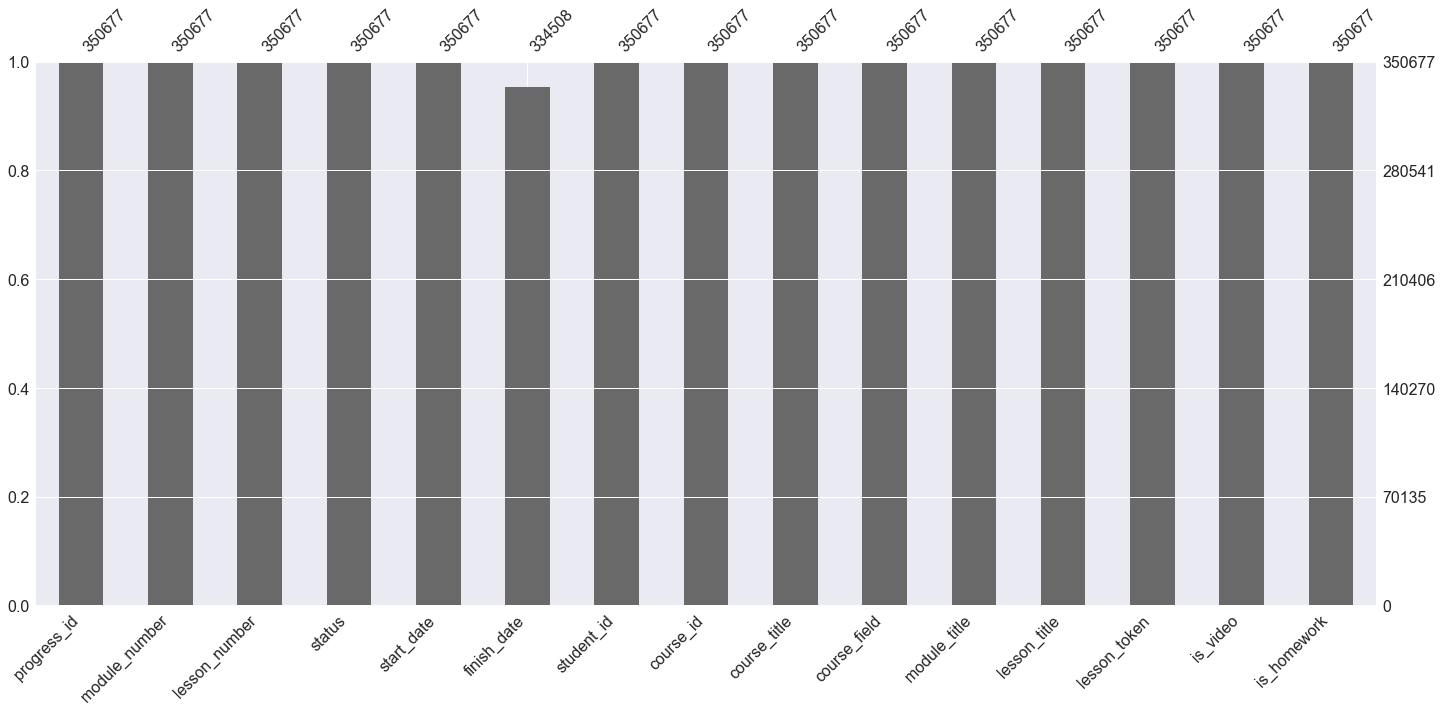

In [12]:
msno.bar(df_main_dataframe)
# датасет чистый, не хватает данных в колонке finish_date. 
# Вероятно, не все студенты на момент формирования датафрема успели закончить курсы

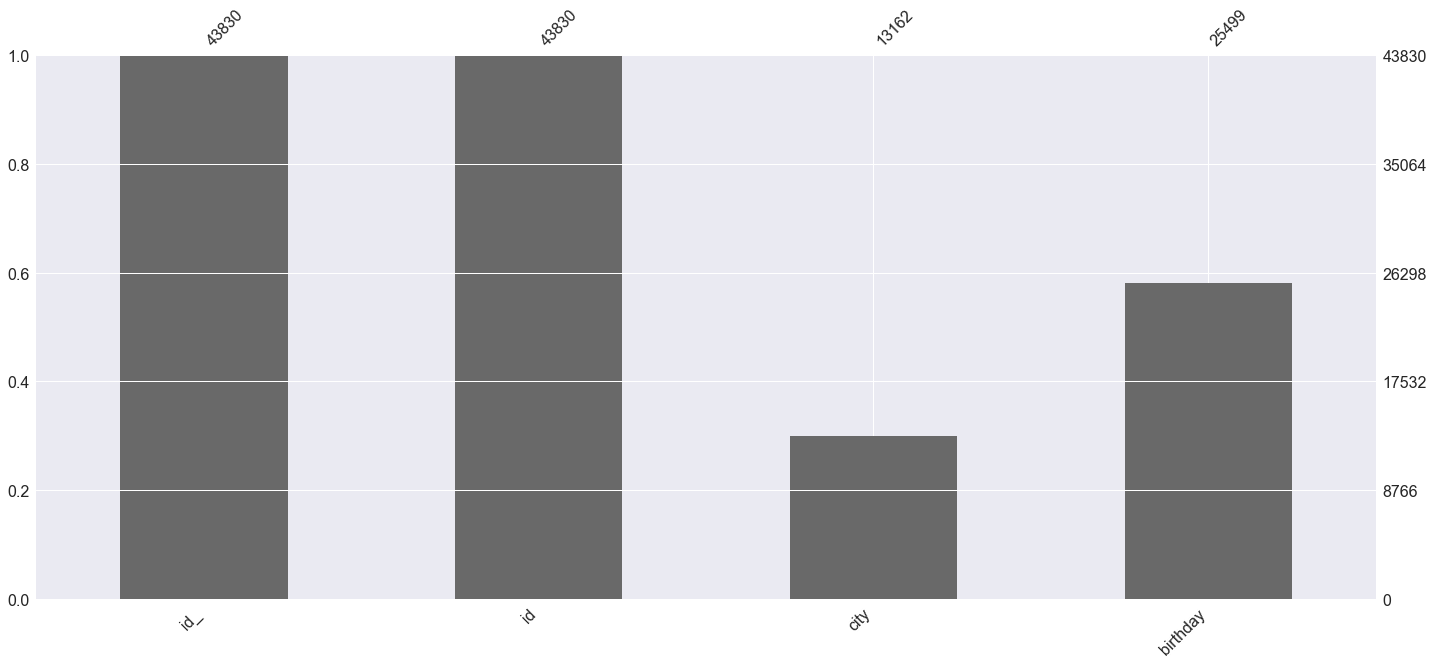

In [14]:
msno.bar(df_students)
# Отсутсвует очень много данных в колонках city u birthday

**Описание данных**

Опишите данные: <br>
1. **(p)** Посчитайте
      * общее количество курсов в датасете, 
      * количество модулей на каждом курсе, 
      * количество уроков в каждом модуле на каждом курсе, 
      * медианное количество уроков в модуле на каждом курсе, 
      * количество учеников на каждом курсе
      * минимальный, максимальный, средний, медианный возраст студентов
      * минимальный, максимальный, средний, медианный возраст студентов на каждом курсе
2. **(m)** Постройте bar-chart, отражающий количество студентов на каждом курсе. Ticks нужно развернуть так, чтобы они были читаемы
3. **(m)** Постройте горизонтальный (столбцы должны располагаться горизонтально) bar-chart, отражающий количество студентов на каждом курсе. График должен иметь заголовок. Значения должны быть отсортированы. Цвет столбцов должен содержать информацию о сфере, к которой относится курс (то есть нужна легенда). Прозрачность должна стоять на отметке 0.1. На график должна быть нанесена линия медианы. У медианы должен быть свой цвет. Рамки у графика быть не должно ⭐
4.     На основании рассчитанных значений опишите данные (описание должно быть полным и покрывать все полученные выше метрики)

1. **(p)** Посчитайте
      * общее количество курсов в датасете, 
      * количество модулей на каждом курсе, 
      * количество уроков в каждом модуле на каждом курсе, 
      * медианное количество уроков в модуле на каждом курсе, 
      * количество учеников на каждом курсе
      * минимальный, максимальный, средний, медианный возраст студентов
      * минимальный, максимальный, средний, медианный возраст студентов на каждом курсе

In [9]:
# список название курсов(уникальных знаений)
list_coursess = pd.unique(df_main_dataframe['course_title'])
print(len(list_coursess)) # вывод кол-ва 

15


In [10]:
#количество модулей на каждом курсе. 
#Применена функция max, т.к. наибольшим значение номера модуля и будет общим кол-вом модулей в курсе
df_modules_count = df_main_dataframe[['course_title','module_number']].groupby(['course_title']).agg(['max'])
df_modules_count

,module_number
,max
course_title,
Excel Базовый,9
Java-разработчик,17
Java-разработчик c нуля,9
JavaScript с нуля,18
PHP-разработчик с 0 до PRO. Часть 1,8
SMM-маркетолог от А до Я,11
UX-дизайн,20
Анимация интерфейсов,21


In [11]:
#количество уроков в каждом модуле на каждом курсе.
#по анаогии с предыдущим заданием, номер последнего урока в курсе, это общее кол-во уроков на курсе.
df_lessons_count=df_main_dataframe[['course_title','module_number','lesson_number']].\
groupby(['course_title','module_number']).agg(['max'])
df_lessons_count

lesson_number
                                                      max
course_title                  module_number              
Excel Базовый                 1                        11
                              2                         7
                              3                         3
                              4                         7
                              5                         5
...                                                   ...
Руководитель digital-проектов 13                        4
                              14                        7
                              15                       12
                              16                        8
                              17                        4

[229 rows x 1 columns]

In [14]:
#медианное количество уроков в модуле на каждом курсе. 
#аналогично, по номерам уроков считаем среднее кол-во уроков
df_lessons_count_med=df_main_dataframe[['course_title','module_number','lesson_number']].\
groupby(['course_title','module_number']).agg(['median'])

df_lessons_count_med

lesson_number
                                                   median
course_title                  module_number              
Excel Базовый                 1                       5.0
                              2                       4.0
                              3                       2.0
                              4                       4.0
                              5                       3.0
...                                                   ...
Руководитель digital-проектов 13                      2.0
                              14                      4.0
                              15                      6.0
                              16                      4.0
                              17                      2.0

[229 rows x 1 columns]

In [72]:
#количество учеников на каждом курсе
df_lessons_count_students =  df_main_dataframe[['course_title','student_id']].\
                    groupby(['course_title']).agg(students_count = ('student_id', 'nunique')) 
df_lessons_count_students

,students_count
course_title,
Excel Базовый,782
Java-разработчик,763
Java-разработчик c нуля,581
JavaScript с нуля,966
PHP-разработчик с 0 до PRO. Часть 1,854
SMM-маркетолог от А до Я,506
UX-дизайн,1151
Анимация интерфейсов,598
Веб-вёрстка для начинающих 2.0,2004


In [20]:
#Определяем минимальный, максимальный, средний, медианный возраст студентов
df_students_ages = df_students[['id_','id','city','birthday']]
df_students_ages.dropna(subset=['birthday'], inplace=True) # удалены отсуствующие значения дат 
df_students_ages.birthday = df_students_ages.birthday.apply\
(lambda x: datetime.strptime (x, '%Y-%m-%d')) # преобразование формата
today = datetime.today()
# рассчитываем возраст, сегодняшнюю дату вычитаем из даты рождения
df_students_ages['age'] = df_students_ages['birthday'].apply(
               lambda x: today.year - x.year - 
               ((today.month, today.day) < (x.month, x.day)) 
               )

In [17]:
df_students_ages['age'].describe() 
#минимальный возраст -7166, максимальный возраст 202 это неверно, в данных есть ошибки

count    25499.000000
mean        30.238990
std         77.718134
min      -7166.000000
25%         25.000000
50%         30.000000
75%         35.000000
max       2020.000000
Name: age, dtype: float64

In [18]:
df_students_ages[(df_students_ages['age'] <= 0)] # смотрим датафрейм, видим, что неверно указан год рождения. 
#Такие данные нужно удалить для верности дальнейших рассчетов. 

,id_,id,city,birthday,age
7408,42112,9c617fe74f0ca3fde731b20717bda5b9,Miami,9000-11-11 00:00:00,-6979
9921,32545,4329569d8d53ddedf5cb6b4624a2ee86,Химки,2082-04-21 00:00:00,-61
17081,43205,1375ced1c54e81e2a4ba2c999f35ba14,Санкт-Петербург,2075-11-05 00:00:00,-54
21051,39499,542130d5101c8561b326c4cd85bdea29,Vienna,8198-09-19 00:00:00,-6177
22628,96997,33c56b74ba8fbff1310d011ac6604980,hОРОД,2180-09-03 00:00:00,-159
32202,96045,99f27de94051f7c52330985c332cc63b,Долгопрудный,2199-10-07 00:00:00,-178
36069,39502,1eb63b3df883d14cebecec90ce9ed5f4,Санкт-Петербург,9187-04-19 00:00:00,-7166
38632,30905,7d96955322b18fd6a2b196411427ebcd,Санкт-Петербург,2034-08-04 00:00:00,-13


In [21]:
#удаляем нереальные значения возраста: отрицательные, нулевые значения, значения больше 100 из данных.
df_students_ages.drop(df_students_ages[(df_students_ages.age < 0) | (df_students_ages.age > 100) ].index,axis = 0, inplace=True)

In [22]:
df_students_ages.describe() # смотрим итог. 
#Данные max и min по прежнему неверные, т.к. маловерноятно, что на курсах были люди 2х и 99 лет.

,id_,age
count,25469.000000,25469.000000
mean,82721.859987,30.941615
std,37893.007027,7.761762
min,3898.000000,2.000000
25%,37463.000000,26.000000
50%,102694.000000,30.000000
75%,113482.000000,35.000000
max,124547.000000,99.000000


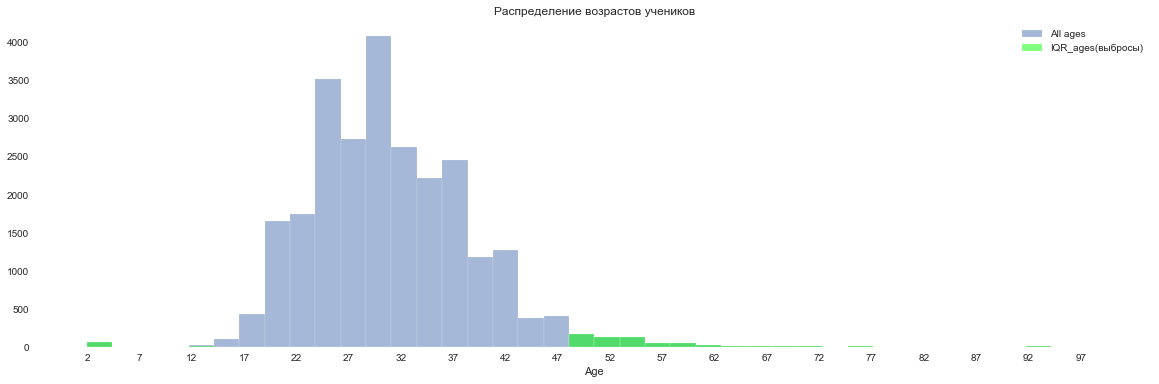

In [24]:
#рассчитываем IQR для определения выбросов. Строим гистограммы выбросов и всех возрастов в выборке. 
Q1 =  df_students_ages['age'].quantile(0.25)
Q3 = df_students_ages['age'].quantile(0.75)
IQR = Q3 - Q1
df_IQR = df_students_ages[(df_students_ages['age'] < Q1-1.5*IQR ) | (df_students_ages['age'] > Q3+1.5*IQR)]['age']
fig, ax = plt.subplots(figsize=(20,6))
_, bins, _ = ax.hist(df_students_ages['age'], label = 'All ages', alpha=0.5, bins=40)
ax.hist(df_IQR,label = "IQR_ages(выбросы)", alpha=0.5, bins=bins, color = "lime")

ax.set_title('Распределение возрастов учеников')
ax.set_xlabel('Age')
ax.set_xticks(range(df_IQR.min(),df_IQR.max(),5))
ax.legend()

plt.show()

In [25]:
#удаляем из датасета выбросы
df_students_ages.drop(df_students_ages[(df_students_ages['age'] < Q1-1.5*IQR ) | (df_students_ages['age'] > Q3+1.5*IQR)].index,axis = 0, inplace=True)

In [26]:
df_students_ages.describe()
#минимальный возраст студентов 10 лет
#максимальный возраст студентов 50 лет
#средний возраст студентов 30 лет
#медианный возраст студентов 30

,id_,age
count,24800.000000,24800.000000
mean,82807.169839,30.452944
std,37871.271580,6.702978
min,3898.000000,13.000000
25%,37492.750000,26.000000
50%,102725.000000,30.000000
75%,113481.250000,35.000000
max,124547.000000,48.000000


In [118]:
df_students_ages[df_students_ages['age'] == 10]

,id_,student_id,city,birthday,age
40387,94551,fed84ff18cb2ee75d036b0509334374e,Москва,2011-11-11 00:00:00,10


In [105]:
df_students_ages

,id_,id,city,birthday,age
1,7503,6c3e52be632fc50de9640147e4017dcd,Москва,1979-10-23 00:00:00,42
7,11070,35a36d90b745992b59085c8d54a072e7,Красноярск,1991-08-15 00:00:00,30
8,11756,37e8e8179295ae764524223086b0b568,Москва,1987-08-24 00:00:00,34
11,13568,fb10649db552c5f451bea45ed754d428,Санкт-Петербург,1988-07-16 00:00:00,33
15,15112,d15a188c90bb4d83957ac14de78fada4,Санкт-Петербург,1991-01-16 00:00:00,31
...,...,...,...,...,...
43821,124068,75e54bba2c6a49602ae0547e1f990d21,NaN,1993-02-16 00:00:00,28
43824,124234,afbc1ca2ed9ff60239c5d95e0df23856,NaN,1994-04-24 00:00:00,27
43825,124251,a65ccacbe0226b345f195d02e676aa04,NaN,2000-11-21 00:00:00,21
43826,124338,148f1375e4135e779053a0d4b2a63857,NaN,1999-10-20 00:00:00,22


In [27]:
#минимальный, максимальный, средний, медианный возраст студентов на каждом курсе
#добавляем в общую таблицу данные о возрасте студентов   
df_students_ages.rename(columns = {'id':'student_id'}, inplace = True)    
df_ages_courses = pd.merge(df_students_ages,df_main_dataframe, on = 'student_id',how = 'inner')  
df_ages_courses.head(2)

,id_,student_id,city,birthday,age,progress_id,module_number,lesson_number,status,start_date,finish_date,course_id,course_title,course_field,module_title,lesson_title,lesson_token,is_video,is_homework
0,11070,35a36d90b745992b59085c8d54a072e7,Красноярск,1991-08-15 00:00:00,30,da26551a71cd62bbab844e3e54af7f71,1,1,done,2018-02-20 07:31:59.678116+00,2018-05-02 20:33:28.093842+00,6e4837f0a65c68efbfdd0594d6774701,Java-разработчик,Development,Вводный модуль,Введение,e15d485d-f3cd-4b1a-a675-59d322c53542,True,False
1,11070,35a36d90b745992b59085c8d54a072e7,Красноярск,1991-08-15 00:00:00,30,da26551a71cd62bbab844e3e54af7f71,1,2,done,2018-05-02 20:33:28.700864+00,2018-05-02 20:34:12.55053+00,6e4837f0a65c68efbfdd0594d6774701,Java-разработчик,Development,Вводный модуль,Какие бывают программы?,5bc43fee-3cb7-46e0-950c-8191ebb1e4da,True,False


In [117]:
df_ages_courses.describe()

,id_,age,module_number,lesson_number
count,325761.000000,325761.000000,325761.000000,325761.000000
mean,56391.412707,30.884919,5.022305,4.269185
std,35823.376942,6.258171,4.279598,3.438650
min,4233.000000,15.000000,1.000000,1.000000
25%,27324.000000,26.000000,2.000000,2.000000
50%,37446.000000,30.000000,4.000000,3.000000
75%,98180.000000,35.000000,7.000000,6.000000
max,124515.000000,50.000000,21.000000,29.000000


In [28]:
#вычисляем минимальный, максимальный, средний, медианный возраст студентов на каждом курсе
df_ages_count=df_ages_courses[['course_title','age',]].\
groupby(['course_title']).agg(['median','mean','min','max'])
df_ages_count

age                   
                                    median       mean min max
course_title                                                 
Excel Базовый                           34  34.177525  18  48
Java-разработчик                        30  30.640982  16  48
Java-разработчик c нуля                 31  31.085019  16  48
JavaScript с нуля                       29  29.904855  15  48
PHP-разработчик с 0 до PRO. Часть 1     31  31.589382  15  48
SMM-маркетолог от А до Я                30  30.382322  19  47
UX-дизайн                               32  31.853560  17  48
Анимация интерфейсов                    31  31.465536  17  48
Веб-вёрстка для начинающих 2.0          29  29.968446  15  48
Веб-дизайн PRO 2.0                      29  29.910199  16  48
Веб-дизайн Базовый                      30  30.054096  17  48
Веб-дизайн с нуля 2.0                   29  29.465557  15  48
Веб-разработчик                         28  29.086145  15  48
Интернет-маркетолог от Ingate           32  32.633079  18  48
Руководитель digital-проектов           33  33.610336  20  48

In [121]:
#при вычислениях минимального возраста студентов, min = 10, 
#но как видно из таблицы выше, в основной таблице учеников с таким возрастом нет.
#проверим, верно ли были объединены таблицы.Согласно выгрузкам ниже, ученик с возрастом 10 лет, был только в таблице df_students_ages. 
df_students_ages[df_students_ages['age'] == 10]

,id_,student_id,city,birthday,age
40387,94551,fed84ff18cb2ee75d036b0509334374e,Москва,2011-11-11 00:00:00,10


In [122]:
df_main_dataframe[df_main_dataframe['student_id'] == 'fed84ff18cb2ee75d036b0509334374e']

,progress_id,module_number,lesson_number,status,start_date,finish_date,student_id,course_id,course_title,course_field,module_title,lesson_title,lesson_token,is_video,is_homework


In [125]:
df_ages_courses[df_ages_courses['student_id'] == 'fed84ff18cb2ee75d036b0509334374e']

,id_,student_id,city,birthday,age,progress_id,module_number,lesson_number,status,start_date,finish_date,course_id,course_title,course_field,module_title,lesson_title,lesson_token,is_video,is_homework


In [104]:
df_progress[df_progress['student_id'] == 'fed84ff18cb2ee75d036b0509334374e']

,progress_id,student_id,course_id


2. **(m)** Постройте bar-chart, отражающий количество студентов на каждом курсе. Ticks нужно развернуть так, чтобы они были читаемы

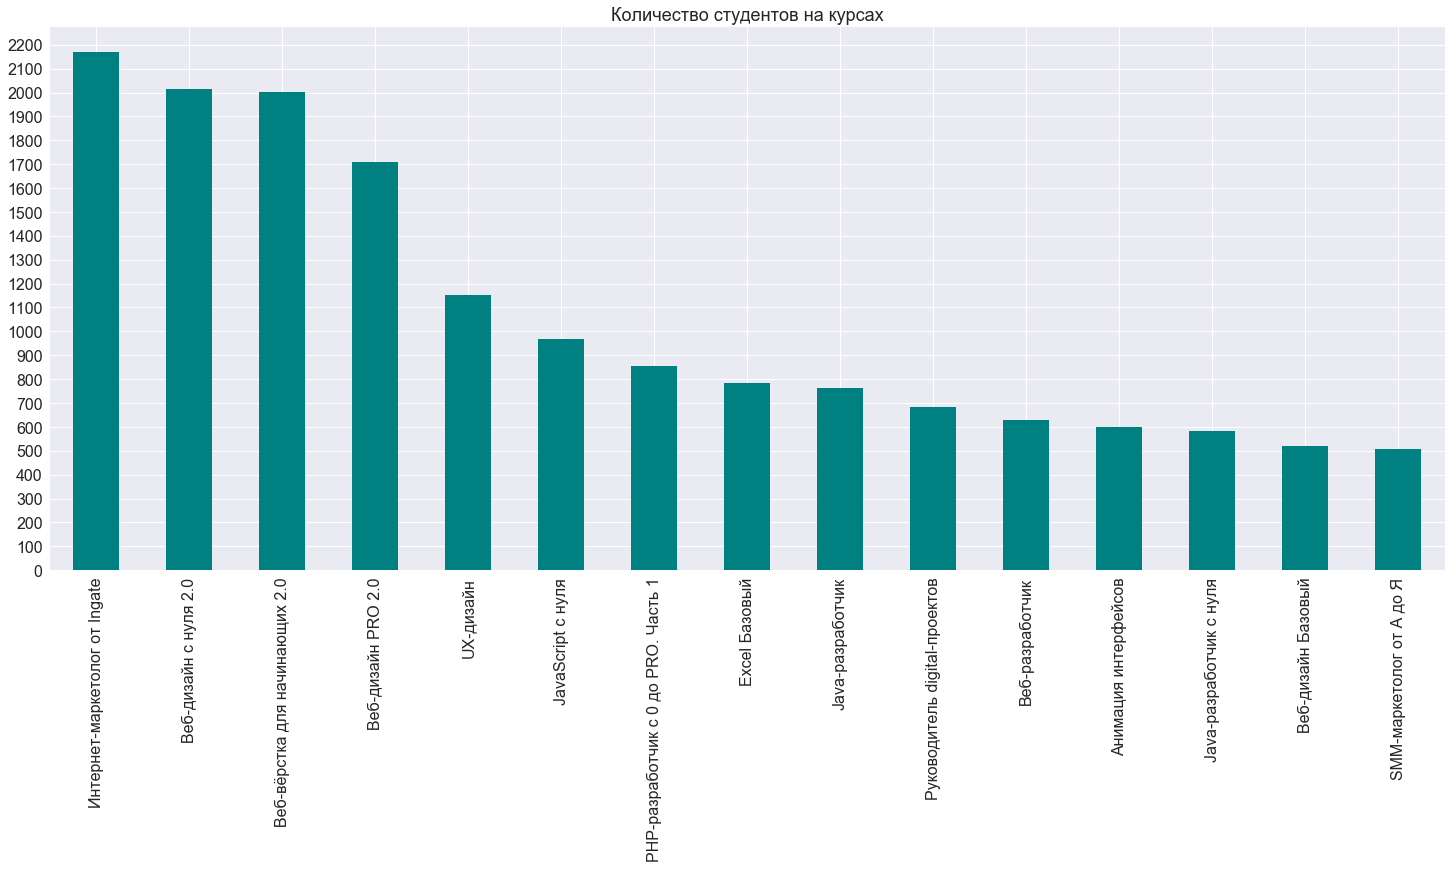

In [105]:
df_lessons_count_students = df_lessons_count_students.sort_values(by='students_count', ascending=False)
plot = df_lessons_count_students.plot.bar(
        figsize=(25,10)
        , fontsize=16
        , stacked=True
        , title='Количество студентов на курсах', color = 'teal')
plot.title.set_size(18)
plot.set(ylabel=None, xlabel=None)
plt.xticks(rotation=90) 
plt.yticks(range(0, max(df_lessons_count_students['students_count'] + 100),100))
plt.legend().remove()
plt.show()

3. **(m)** Постройте горизонтальный (столбцы должны располагаться горизонтально) bar-chart, отражающий количество студентов на каждом курсе. График должен иметь заголовок. Значения должны быть отсортированы. Цвет столбцов должен содержать информацию о сфере, к которой относится курс (то есть нужна легенда). Прозрачность должна стоять на отметке 0.1. На график должна быть нанесена линия медианы. У медианы должен быть свой цвет. Рамки у графика быть не должно ⭐

In [16]:
# Обновляем датафрейм для построения графика ( добавлен столбец о сфере)
df_lessons_count_students =  df_main_dataframe[['course_title','student_id','course_field']].\
                          groupby(['course_title','course_field']).agg(students_count = ('student_id', 'nunique')) 
df_lessons_count_students.reset_index(inplace=True) 
df_lessons_count_students.head(2)

,course_title,course_field,students_count
0,Excel Базовый,Business,782
1,Java-разработчик,Development,763


In [17]:
# Сортируем значения по количеству стундентов 
df_lessons_count_students = df_lessons_count_students.sort_values(by ='students_count', ascending = True) 

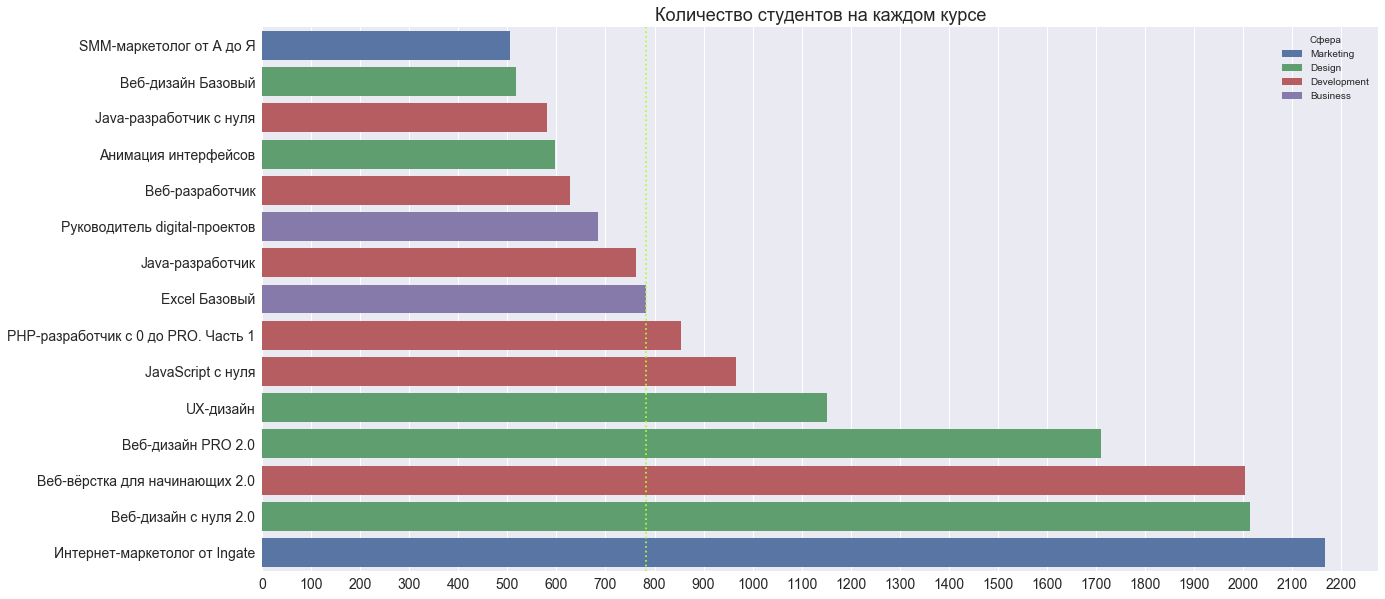

In [18]:
plt.figure(figsize=(20,10))

sns.barplot(y = 'course_title', x ='students_count', 
            hue = 'course_field', data=df_lessons_count_students,
            dodge=False).set(ylabel=None, xlabel=None)  # настроена ширина
                                                                    # удалены лейблы по осям x,y

plt.title("Количество студентов на каждом курсе", fontsize=18)
plt.xticks(np.arange(0, max(df_lessons_count_students['students_count']+100),100))
plt.tick_params(labelsize=14)
plt.axvline(x = np.median(df_lessons_count_students['students_count']),\
                      color='greenyellow',linestyle=':')
plt.legend(title='Сфера') # название легенды
sns.set_style('ticks') # установлен стиль графика
sns.despine(fig=None) # удалена рамка графика
sns.color_palette("hls", 8) # установлена цветовая схема
plt.show()

# Итог. 
Описание данных.

* Oбщее количество курсов в датасете: 15
* Количество модулей на каждом курсе: от 8 до 21
* Количество учеников на каждом курсе: от 506 до 2168
* Минимальный возраст студентов: 15 лет
* Максимальный возраст студентов: 50 лет.
* Средний возраст студентов : от 29 до 34 лет.

Самым полулярным курсом является "Интернет-Маркетолог". 
Вторыми по полулярности - "Веб-дизайн c нуля 2.0" и "Веб-верстка для начинающих 2.0". 
Примечательно, что один из самых непопулярных курсов это "Веб-дизайн базовый". 
Т.е. можно предположить, что обновленный курс "Веб-дизайн c нуля 2.0" по содержанию/стоимости/срокам и другим параметрам более привлекателен и выбор будущих учеников падает на него. Второе предположение, что этот курс был закрыт и 
обновлен на курс "Веб-дизайн c нуля 2.0" в рассматриваемый период. 

В целом в топе - 5 курсов преобладают курсы в сфере Дизайна.
